In [ ]:
#hide
from utilities.ipynb_docgen import *
from nbdev import *

# Analyses

> Ongoing analyses


**List of routines used for these analyses**
- `get_cells`
- `get_lightcurve`
- `get_bb_partition`
- `partition_cells`
- `fit_cells`
- `flux_plot`
- `simulate_cells`

In [ ]:
#collapse-hide
from light_curves.config import *
from light_curves.bayesian import *
from light_curves.simulation import *
from light_curves.lightcurve import *
from light_curves.cells import *

def bb_overplot(config, lc, bb_fit, ax=None):
    fig, ax = plt.subplots(1,1, figsize=(12,4)) if not ax else (ax.figure, ax)
    flux_plot(config, lc, ax=ax,  colors=(('lightblue', 'sandybrown', 'blue')))
    flux_plot(config, bb_fit, ax=ax, step=True)
    
def simulation(config, source):

    lc = get_lightcurve(config, source)
    data_cells = get_cells(config, source)

    #  Get the rate from the data
    cq = data_cells.query('e>0.3')
    T, N = np.sum(cq.tw), np.sum(cq.n)
    sflux=lambda t: N/T

    # simulate, then fit cells to create a simulated light curve 
    sim_cells = simulate_cells(config, source, source_flux=sflux  )
    sim_lc  = fit_cells(config, sim_cells) 

    sim_edges = get_bb_partition(config, sim_lc,  key='simulated_BB_partition_Geminga') 

    # partion, then fit the cells according to the edges
    sim_bb_cells = partition_cells(config, sim_cells, sim_edges);
    sim_bb_fit  = fit_cells(config, sim_bb_cells, )
    return sim_lc, sim_bb_fit

def data(config, source):
    lc = get_lightcurve(config, source)
    cells = get_cells(config, source)
    edges = get_bb_partition(config, lc, LikelihoodFitness, key='bb-Geminga-test') 
    bb_cells = partition_cells(config, cells, edges);
    bb_lc  = fit_cells(config, bb_cells, )
    return lc, bb_lc

def fit_table(lc):
    fits = lc.fit
    flux = fits.apply(lambda f: f.flux)
    errors = fits.apply(lambda f: (round(f.errors[0]-f.flux,3), round(f.errors[1]-f.flux ,3) ) )
    sigma_dev = fits.apply(lambda f: round(f.poiss.sigma_dev(1),1) )
    df = lc['t tw n e'.split()]; df
    df.loc[:,'flux'] = flux.values.round(4)
    df.loc[:, 'errors'] = errors.values
    df.loc[:, 'sigma_dev'] = sigma_dev.values
    return df

In [ ]:
source=PointSource('Geminga')
config = Config()
print('----------- data ---------------------')
lc, bb_lc = data(config, source)
print('-----------simulation ----------------')
sim_lc, sim_bb_lc = simulation(config, source)

----------- data ---------------------
Light curve for Geminga: Restoring from cache with key "lightfcurve_Geminga"
Cell data for Geminga: Restoring from cache with key "cells_Geminga"
BB edges for...: Restoring from cache with key "bb-Geminga-test"
Partitioned 3873 cells into 17 blocks, using LikelihoodFitness 
Loaded 17 / 17 cells with exposure > 0.3 for fitting
-----------simulation ----------------
Light curve for Geminga: Restoring from cache with key "lightfcurve_Geminga"
Cell data for Geminga: Restoring from cache with key "cells_Geminga"
binned exposure for source Geminga: Restoring from cache with key "binned_exposure_Geminga"
Weight histogram for Geminga: Restoring from cache with key "weight_hist_Geminga"
Loaded 3873 / 4015 cells with exposure > 0.3 for fitting
BB edges for...: Restoring from cache with key "simulated_BB_partition_Geminga"
Partitioned 3873 cells into 2 blocks, using LikelihoodFitness 
Loaded 2 / 2 cells with exposure > 0.3 for fitting


In [ ]:
#
df =fit_table(sim_bb_lc)
df

,t,tw,n,e,flux,errors,sigma_dev
0,56675.5,3985.0,1114588,1.005,0.991,"(-0.001, 0.001)",-6.7
1,58682.5,29.0,3042,0.374,1.017,"(-0.024, 0.025)",0.7


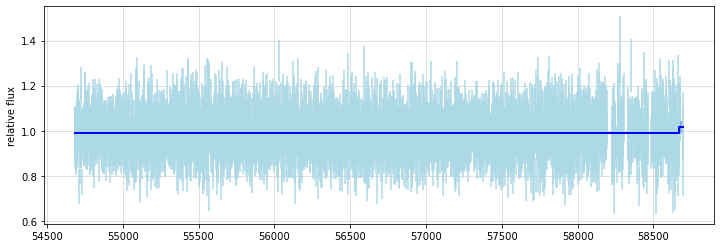

In [ ]:
bb_overplot(config, sim_lc, sim_bb_lc)    

In [ ]:
fit_table(bb_lc)

,t,tw,n,e,flux,errors,sigma_dev
0,55027.0,688.0,207832,1.126,0.998,"(-0.003, 0.003)",-0.5
1,55378.0,14.0,3797,0.911,1.122,"(-0.024, 0.025)",5.1
2,55560.5,351.0,96416,1.028,0.985,"(-0.004, 0.004)",-3.5
3,55748.0,24.0,6887,0.960,1.123,"(-0.018, 0.018)",7.0
4,56113.0,706.0,190965,1.011,0.991,"(-0.003, 0.003)",-2.8
5,56486.0,40.0,11267,0.989,1.070,"(-0.014, 0.014)",5.3
6,56512.5,13.0,3402,1.046,0.901,"(-0.021, 0.022)",-4.4
7,56673.5,309.0,84043,1.020,0.989,"(-0.005, 0.005)",-2.3
8,56879.5,103.0,28168,0.996,1.027,"(-0.008, 0.008)",3.2
9,56972.5,83.0,20961,0.957,0.966,"(-0.009, 0.009)",-3.7


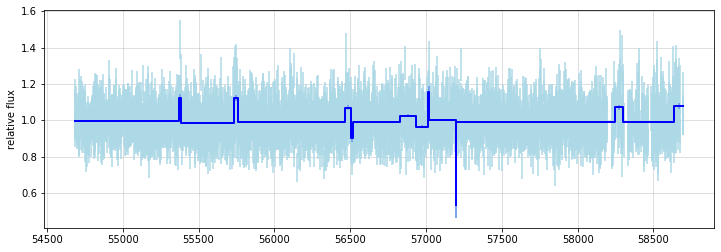

In [ ]:
bb_overplot(config, lc, bb_lc)    

In [ ]:
#collapse-hide
def analysis_plots(name):
    """
    ### Geminga light curve with Bayesian Blocks partition, fits to blocks
    
    {output}
    
    This shows the fits to all cells, with the BB fit overlays
    {fig1}
    
    Since this is a constant source, there should be no breaks, that is, only one partition.
    Here is a table of the partition fits:
    
    {df_text}
    The last column represents the compatibility of the flux measuremnt for each partition
    with the expected value 1.0 in equivalent sigma units.
    
    Finally, look at plots for the short, < 100 day partitions.
    {fig2}
    """
    config = Config()
    source = PointSource(name)
    # need both light curve and cells
    
    with capture_print(
        'Analysis output: get cells, fit each, partition with BB, fit each partition'
                    ) as output:

        lc = get_lightcurve(config, source)
        cells = get_cells(config, source)
        edges = get_bb_partition(config, lc, LikelihoodFitness, key='bb-Geminga-test') 

        bb_cells = partition_cells(config, cells, edges);
        bb_fit  = fit_cells(config, bb_cells, )
    fits = bb_fit.fit
    flux = fits.apply(lambda f: f.flux)
    errors = fits.apply(lambda f: (round(f.flux-f.errors[0],3), round(f.errors[1]-f.flux ,3) ) )
    sigma_dev = fits.apply(lambda f: round(f.poiss.sigma_dev(1),1) )
    df = bb_fit['t tw n e'.split()]; df
    df.loc[:,'flux'] = flux.values.round(3)
    df.loc[:, 'errors'] = errors.values
    df.loc[:, 'sigma_dev'] = sigma_dev.values

    pd.set_option('display.precision', 3)#, 'display.colheader_justify','left')
    df_text = monospace(str(df), 'BB fit table', open=True)
        
    plt.rc('font', size=16)
    fig1, ax = plt.subplots(1,1, sharex=True, figsize=(10,4), num=1)
    bb_overplot(config, lc, bb_fit, ax = ax)
    ax.text(0.05, 0.85, name,  transform=ax.transAxes);
    fig1.width=600


    bb_short = bb_fit.query('tw<100');

    fig2, axx = plt.subplots(3,3, figsize=(15, 12),sharey=True, sharex=True,
                          gridspec_kw=dict(top=0.85, left=0.08, bottom=0.15, hspace=0.2 ),num=2)
    fig2.width=600
    for t, ax in zip(bb_short.t, axx.flatten()):
        bb_overplot(config, lc, bb_fit, ax=ax, tzero=t, xlim=(-50, +50))
        
    return locals()

if Config().valid:
    nbdoc(analysis_plots, 'Geminga')

### Geminga light curve with Bayesian Blocks partition, fits to blocks

<details  class="nbdoc-description" >  <summary> Analysis output: get cells, fit each, partition with BB, fit each partition </summary>  <div style="margin-left: 5%"><pre>Light curve for Geminga: Restoring from cache with key "lightfcurve_Geminga"<br>Cell data for Geminga: Restoring from cache with key "cells_Geminga"<br>BB edges for...: Restoring from cache with key "bb-Geminga-test"<br>Partitioned 3873 cells into 17 blocks, using LikelihoodFitness <br>Loaded 17 / 17 cells with exposure &gt; 0.3 for fitting<br></pre></div> </details>

This shows the fits to all cells, with the BB fit overlays
<div class="nbdoc_image">
<a href="images/analysis_plots_fig_01.png"><figure style="margin-left: 5%">
   <img src="images/analysis_plots_fig_01.png" alt="Figure 1 at images/analysis_plots_fig_01.png" width=600> 
</figure></a></div>


Since this is a constant source, there should be no breaks, that is, only one partition.
Here is a table of the partition fits:

<details open class="nbdoc-description" >  <summary> BB fit table </summary>  <div style="margin-left: 5%"><pre>          t      tw       n     e  flux          errors  sigma_dev<br>0   55027.0   688.0  207832  1.13  1.00  (0.003, 0.003)       -0.5<br>1   55378.0    14.0    3797  0.91  1.12  (0.024, 0.025)        5.1<br>2   55560.5   351.0   96416  1.03  0.98  (0.004, 0.004)       -3.5<br>3   55748.0    24.0    6887  0.96  1.12  (0.018, 0.018)        7.0<br>4   56113.0   706.0  190965  1.01  0.99  (0.003, 0.003)       -2.8<br>5   56486.0    40.0   11267  0.99  1.07  (0.014, 0.014)        5.3<br>6   56512.5    13.0    3402  1.05  0.90  (0.021, 0.022)       -4.4<br>7   56673.5   309.0   84043  1.02  0.99  (0.005, 0.005)       -2.3<br>8   56879.5   103.0   28168  1.00  1.03  (0.008, 0.008)        3.2<br>9   56972.5    83.0   20961  0.96  0.97  (0.009, 0.009)       -3.7<br>10  57017.5     7.0    2070  0.97  1.16  (0.034, 0.034)        4.8<br>11  57109.0   176.0   45616  0.95  1.00  (0.006, 0.006)        0.5<br>12  57197.5     1.0     149  0.85  0.54  (0.066, 0.071)       -5.6<br>13  57723.0  1050.0  285243  1.01  0.99  (0.003, 0.003)       -2.9<br>14  58274.0    52.0    9282  0.62  1.07  (0.015, 0.015)        4.8<br>15  58468.5   337.0   74075  0.81  0.99  (0.005, 0.005)       -1.7<br>16  58667.0    60.0   10261  0.59  1.08  (0.015, 0.015)        5.5</pre></div> </details>
The last column represents the compatibility of the flux measuremnt for each partition
with the expected value 1.0 in equivalent sigma units.

Finally, look at plots for the short, < 100 day partitions.
<div class="nbdoc_image">
<a href="images/analysis_plots_fig_02.png"><figure style="margin-left: 5%">
   <img src="images/analysis_plots_fig_02.png" alt="Figure 2 at images/analysis_plots_fig_02.png" width=600> 
</figure></a></div>



In [ ]:
!date

Mon Dec 21 13:15:52 PST 2020
